<a href="https://colab.research.google.com/github/caibobit/pytorch_learning/blob/master/some_examples_of_pytorch_using.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自定义网络结构

In [0]:
import torch

In [0]:
class TwoLayerNet(torch.nn.Module):
  # 初始化
  def __init__(self, N_in, H, N_out, ):
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, D_out)
  # 定义网络结构
  def forward(self, x):
    h_relu = self.linear1(x).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred
# 开始训练

In [5]:
N, D_in, H, D_out = 64, 1000, 100, 10
# 输入输出
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(20):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 626.6509399414062
1 577.2508544921875
2 534.7283325195312
3 497.7612609863281
4 464.9691162109375
5 435.57318115234375
6 409.46771240234375
7 386.03033447265625
8 364.4560241699219
9 344.4989013671875
10 325.8470153808594
11 308.3971862792969
12 291.979248046875
13 276.5406188964844
14 261.93377685546875
15 248.0458221435547
16 234.87823486328125
17 222.34988403320312
18 210.4288787841797
19 199.07705688476562


In [6]:
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 0, 1, 2, or 3
        and reuse the middle_linear Module that many times to compute hidden layer
        representations.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same Module many
        times when defining a computational graph. This is a big improvement from Lua
        Torch, where each Module could be used only once.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 732.6102294921875
1 732.0255126953125
2 730.4168701171875
3 728.491455078125
4 723.3128051757812
5 719.9273071289062
6 708.7211303710938
7 764.9537353515625
8 675.786376953125
9 707.0348510742188
10 714.8577880859375
11 632.6770629882812
12 591.9976806640625
13 697.3731689453125
14 504.2726135253906
15 590.374755859375
16 708.41796875
17 682.1792602539062
18 547.6839599609375
19 664.4437255859375
20 501.5329895019531
21 687.0004272460938
22 614.716796875
23 589.6864624023438
24 641.4840698242188
25 527.450439453125
26 584.4481811523438
27 249.95895385742188
28 342.5345764160156
29 427.3941955566406
30 396.7411804199219
31 267.3623352050781
32 416.7991027832031
33 214.7925567626953
34 168.09588623046875
35 256.0003967285156
36 226.62298583984375
37 270.52960205078125
38 175.39683532714844
39 133.74774169921875
40 197.80126953125
41 160.50518798828125
42 136.8379364013672
43 135.9206085205078
44 87.08275604248047
45 94.45951843261719
46 110.8766860961914
47 180.5838623046875
48 104.657

In [9]:
! ls

hymenoptera_data.zip  sample_data


In [2]:
! wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2019-06-09 13:32:16--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.253.67, 13.35.253.87, 13.35.253.107, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.253.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  32.1MB/s    in 1.4s    

2019-06-09 13:32:17 (32.1 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [0]:
! unzip -q hymenoptera_data.zip 

In [4]:
! ls

hymenoptera_data  hymenoptera_data.zip	sample_data


In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()   # interactive mode

In [0]:
data_dir = 'hymenoptera_data'
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

In [0]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

In [0]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
class_names

['ants', 'bees']

In [12]:
image_datasets['train'].class_to_idx

{'ants': 0, 'bees': 1}

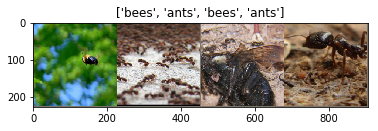

In [13]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [16]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:01<00:00, 27736447.06it/s]


In [17]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5049 Acc: 0.7336
val Loss: 0.3137 Acc: 0.8693

Epoch 1/24
----------
train Loss: 0.4768 Acc: 0.8033
val Loss: 0.2317 Acc: 0.9085

Epoch 2/24
----------
train Loss: 0.5408 Acc: 0.8197
val Loss: 0.4172 Acc: 0.8562

Epoch 3/24
----------
train Loss: 0.6232 Acc: 0.7787
val Loss: 0.2445 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4692 Acc: 0.8197
val Loss: 0.3283 Acc: 0.8824

Epoch 5/24
----------
train Loss: 0.4278 Acc: 0.7910
val Loss: 0.2566 Acc: 0.8889

Epoch 6/24
----------
train Loss: 0.3811 Acc: 0.8443
val Loss: 0.2510 Acc: 0.9150

Epoch 7/24
----------
train Loss: 0.2818 Acc: 0.9057
val Loss: 0.2579 Acc: 0.9020

Epoch 8/24
----------
train Loss: 0.3533 Acc: 0.8484
val Loss: 0.2526 Acc: 0.9020

Epoch 9/24
----------
train Loss: 0.2386 Acc: 0.8770
val Loss: 0.2284 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.3165 Acc: 0.8689
val Loss: 0.2457 Acc: 0.9020

Epoch 11/24
----------
train Loss: 0.2815 Acc: 0.8689
val Loss: 0.2054 Acc: 0.9216

Ep

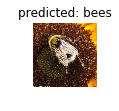

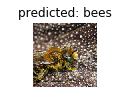

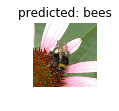

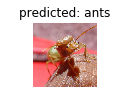

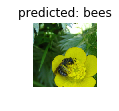

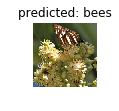

In [18]:
visualize_model(model_ft)

In [0]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [21]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6761 Acc: 0.6107
val Loss: 0.2203 Acc: 0.9477

Epoch 1/24
----------
train Loss: 0.4657 Acc: 0.7951
val Loss: 0.2080 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.4637 Acc: 0.8033
val Loss: 0.3200 Acc: 0.8562

Epoch 3/24
----------
train Loss: 0.4975 Acc: 0.7746
val Loss: 0.4665 Acc: 0.7908

Epoch 4/24
----------
train Loss: 0.4243 Acc: 0.7992
val Loss: 0.1839 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4483 Acc: 0.8074
val Loss: 0.1848 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.3101 Acc: 0.8566
val Loss: 0.1646 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.3003 Acc: 0.8730
val Loss: 0.1687 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.4597 Acc: 0.8033
val Loss: 0.1942 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3426 Acc: 0.8197
val Loss: 0.1895 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.4236 Acc: 0.8115
val Loss: 0.1835 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.2837 Acc: 0.8770
val Loss: 0.1823 Acc: 0.9608

Ep

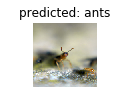

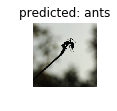

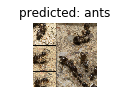

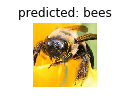

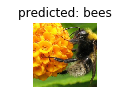

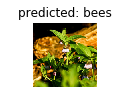

In [22]:
visualize_model(model_conv)

plt.ioff()
plt.show()